## sentiment analysis - TFIDF feature weighting with RNN classification

`Term Weighting = TFIDF`

# Libraries

In [2]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #Count Vector Space Model
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics #Matrix Builder
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold #Import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.sparse import csr_matrix

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout

from keras import Sequential
from keras.models import load_model

from sklearn.model_selection import KFold

import tensorflow as tf

# Load Dataset

In [3]:
# #import dataset bahasa indonesia eno
# # !gdown --id 1BczBYm2d_BZxbcHD6xhzDqMyAF8xCK6Y

# #dataset 5000 nabil
# # !gdown --id 1b4hiK6l4WM7EOHF61xmuwqdooT4PNXrW

# #import dataset label 400 of 5000
# !gdown --id 1FWZKEKG-VzZYWC4xGtfsNWicOY3LQZT5

# # data akib
# !gdown --id 1m9bYEwhzvFoyvzLEqdd6GCe3Bd5zt8mq

_`preprocessed dataset`_

In [22]:
df = pd.read_csv('D:\kuliah\THE ONLY TA THINGS\DATA\data clean\cleaned_15000_data_sample.csv')
df

,content,score,at,label,cleansing,case_folding,no_unwanted,tokenize,normalization,stopwords,stemming,clean
0,Keren,5,2023-04-14 19:21:43,1,Keren,keren,keren,['keren'],['keren'],['keren'],['keren'],keren
1,Woy tiktok menangis gw event mlbb creator base...,5,2023-04-07 23:01:39,1,Woy tiktok menangis gw event mlbb creator base...,woy tiktok menangis gw event mlbb creator base...,woy tiktok menangis gw event mlbb creator base...,"['woy', 'tiktok', 'menangis', 'gw', 'event', '...","['oi', 'tiktok', 'menangis', 'gue', 'event', '...","['tiktok', 'menangis', 'gue', 'event', 'mlbb',...","['tiktok', 'menang', 'gue', 'event', 'mlbb', '...",tiktok menang gue event mlbb creator base gue ...
2,Halo disini saya ingin menyampaikan kepada and...,4,2023-04-07 20:13:21,1,Halo disini saya ingin menyampaikan kepada and...,halo disini saya ingin menyampaikan kepada and...,halo disini saya ingin menyampaikan kepada and...,"['halo', 'disini', 'saya', 'ingin', 'menyampai...","['halo', 'di sini', 'saya', 'ingin', 'menyampa...","['di sini', 'membuka', 'komen', 'lag', 'koneks...","['di sini', 'buka', 'komen', 'lag', 'koneksi',...",di sini buka komen lag koneksi internet bagus ...
3,Jangan mau main tiktokla paket kuota cpt hbis ...,2,2023-04-11 17:06:47,-1,Jangan mau main tiktokla paket kuota cpt hbis ...,jangan mau main tiktokla paket kuota cpt hbis ...,jangan mau main tiktokla paket kuota cpt hbis ...,"['jangan', 'mau', 'main', 'tiktokla', 'paket',...","['jangan', 'mau', 'main', 'tiktokla', 'paket',...","['main', 'tiktokla', 'paket', 'kuota', 'cepat'...","['main', 'tiktokla', 'paket', 'kuota', 'cepat'...",main tiktokla paket kuota cepat habis potong k...
4,Sangat menghibur asyik dan seru,5,2023-04-13 21:08:45,1,Sangat menghibur asyik dan seru,sangat menghibur asyik dan seru,sangat menghibur asyik dan seru,"['sangat', 'menghibur', 'asyik', 'dan', 'seru']","['sangat', 'menghibur', 'asyik', 'dan', 'seru']","['menghibur', 'seru']","['hibur', 'seru']",hibur seru
...,...,...,...,...,...,...,...,...,...,...,...,...
7833,Bagus,5,2023-04-12 07:08:12,1,Bagus,bagus,bagus,['bagus'],['bagus'],['bagus'],['bagus'],bagus
7834,Sangat dramatis dan seru,5,2023-04-07 04:51:48,1,Sangat dramatis dan seru,sangat dramatis dan seru,sangat dramatis dan seru,"['sangat', 'dramatis', 'dan', 'seru']","['sangat', 'dramatis', 'dan', 'seru']","['dramatis', 'seru']","['dramatis', 'seru']",dramatis seru
7835,Baik buat mata +18,5,2023-04-09 10:05:38,1,Baik buat mata,baik buat mata,baik buat mata,"['baik', 'buat', 'mata']","['baik', 'buat', 'mata']",[],[],NaN
7836,min ini gimana gabisa masuk min 😦😦,1,2023-04-10 18:09:14,-1,min ini gimana gabisa masuk min,min ini gimana gabisa masuk min,min ini gimana gabisa masuk min,"['min', 'ini', 'gimana', 'gabisa', 'masuk', 'm...","['min', 'ini', 'bagaimana', 'enggak bisa', 'ma...",['enggak bisa'],['enggak bisa'],enggak bisa


In [23]:
df = df.dropna()
df = df.reset_index(drop=True)
# df = df[df.stemming != '[]']

In [24]:
df.isnull().sum()

content          0
score            0
at               0
label            0
cleansing        0
case_folding     0
no_unwanted      0
tokenize         0
normalization    0
stopwords        0
stemming         0
clean            0
dtype: int64

_`total label value`_

In [25]:
df['label'].value_counts()

label
 1    5738
-1    1118
 0     329
Name: count, dtype: int64

# TFIDF for feature weighting

#### split data test data train

In [26]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df['stemming'], df['label'], test_size=0.2, random_state=42)

In [27]:
# X = df["stemming"]
# y = df["label"] #data target

In [28]:
tfidf_vect = TfidfVectorizer(use_idf = True ,max_features = 5000)
x = tfidf_vect.fit(df["stemming"])
TFIDF = x.transform(df["stemming"])

TFIDF = TFIDF.toarray()
print(TFIDF)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
# tfidf_vect = TfidfVectorizer(use_idf = True ,max_features = 5000)
# x = tfidf_vect.fit(X_test)
# TFIDF_test = x.transform(X_test)
# TFIDF_test = TFIDF_test.toarray()

In [30]:
# from keras_preprocessing.sequence import pad_sequences
# maxlen = 121 # set the maximum sequence length to 121
# TFIDF_train = pad_sequences(TFIDF_train, maxlen=maxlen)
# TFIDF_test = pad_sequences(TFIDF_test, maxlen=maxlen)

_`Seperate label to its own array`_

In [31]:
label = []
for data in df['label']:
    label.append(data)
kolom = label.pop

print(label)

[1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 0, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 0, 1, 1, 1, 1, -1, 1, 1, 1, 0, -1, 1, 1, 1, 1, -1, 1, 1, 0, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 0, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 0, 1, 1, 1, 1, -1, 0, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1

## Define RNN Model

In [32]:
# Define the RNN model
def build_model(input_dim):
    model = Sequential()
    model.add(LSTM(units=128, input_shape=(input_dim, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

## implement w/ k-fold

In [33]:
# set up k-fold cross validation
num_folds = 2
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [34]:
# train and evaluate model
fold = 0
scores = []
for train_index, test_index in kf.split(TFIDF):
    fold += 1
    print('\n')
    print(f'Fold {fold}/{num_folds}\n')

    # split data into train and test sets
    X_train, X_test = TFIDF[train_index], TFIDF[test_index]
    y_train, y_test = np.array(label)[train_index], np.array(label)[test_index]


    model = build_model(input_dim=TFIDF.shape[1])
    model.fit(np.expand_dims(X_train, axis=2), y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))


    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    scores.append(accuracy)

    print('Folds : %d | Cross-validation accuracy : %.4f | Max, Min : %.4f, %.4f' 
            % (fold, np.mean(scores), max(scores), min(scores)))
    print("\n")



Fold 1/2

Epoch 1/5
 4/57 [=>............................] - ETA: 32:53 - loss: 0.6908 - accuracy: 0.5977

In [18]:
# evaluate model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print('Confusion matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(confusion_matrix(y_test, y_pred))
print('Classification report:')
print(classification_report(y_test, y_pred))

1/1 [==============================] - 0s 61ms/step
Confusion matrix:
[[ 0 12]
 [ 0 13]]
[[ 0 12]
 [ 0 13]]
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.52      1.00      0.68        13

    accuracy                           0.52        25
   macro avg       0.26      0.50      0.34        25
weighted avg       0.27      0.52      0.36        25



c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [ ]:
# # Train and evaluate the RNN model using k-fold cross-validation
# folds = range(2,3)

# for k in folds:
#     scores = []
#     kf = KFold(n_splits=k, shuffle=True, random_state=42)
#     for train_index, val_index in kf.split(TFIDF):
#         X_train, X_test = TFIDF[train_index], TFIDF[val_index]
#         label = np.array(label)
#         y_train, y_test = label[train_index], label[val_index]
#         model = build_model(input_dim=TFIDF.shape[1])
#         model.fit(np.expand_dims(X_train, axis=2), y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))
        
#         loss, accuracy = model.evaluate(np.expand_dims(X_test, axis=2), y_test)
#         scores.append(accuracy)
#     print('Folds : %d | Cross-validation accuracy : %.3f | Max, Min : %.3f, %.3f' 
#             % (k, np.mean(scores), max(scores), min(scores)))
#     print("\n")

## Evaluate the RNN model on the test set

In [19]:
loss, accuracy = model.evaluate(np.expand_dims(X_test, axis=2), y_test)
print('Test accuracy:', accuracy)

TypeError: in user code:

    File "c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1788, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\layers\rnn\lstm.py", line 615, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_3' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_3' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [20]:
y_pred_test = np.round(model.predict(np.expand_dims(X_test, axis=2)))
print('Confusion matrix:')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)
class_names = ['negative', 'positive']
print('Classification report:')
print(classification_report(y_test, y_pred_test, target_names=class_names))


TypeError: in user code:

    File "c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Madluke\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\layers\rnn\lstm.py", line 615, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_3' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_3' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


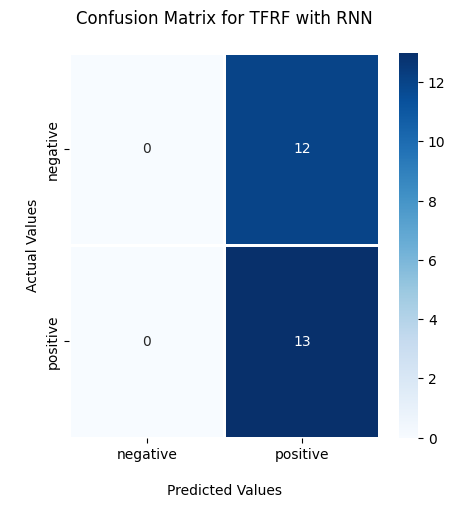

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize = (5, 5))
ax = sns.heatmap(conf_matrix, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['negative', 'positive'],
                    yticklabels = ['negative', 'positive'])
ax.set_title("Confusion Matrix for TFRF with RNN\n")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("\nActual Values")
plt.show()

In [ ]:
#K-Fold Cross Validation will iterate k times
kFoldCrossValidation = KFold(n_splits=5, random_state=0, shuffle = True)

actual_classes = np.empty([0], dtype=int)
predicted_classes = np.empty([0], dtype=int)
    
for train, test in kFoldCrossValidation.split(TFIDF, label):
    #Initiate Train and Test Data then transform to TFIDF value. Then copy to new Train and Test variables. 
    trainData, testData = TFIDF[train], TFIDF[test]
    label = np.array(label)
    trainData2, testData2 = label[train], label[test]

    from keras_preprocessing.sequence import pad_sequences
    maxlen = 121 # set the maximum sequence length to 121
    trainData = pad_sequences(trainData, maxlen=maxlen)
    testData = pad_sequences(testData, maxlen=maxlen)    
    
    
    model = build_model(input_dim=trainData.shape[1])
    model.fit(np.expand_dims(trainData, axis=2), trainData2, batch_size=64, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(np.expand_dims(testData, axis=2), testData2, verbose=0)
    
    actual_classes = np.append(actual_classes, label[test])
    # predicted_classes = np.round(model.predict(np.expand_dims(testData, axis=2)))
    predicted_classes = np.append(predicted_classes, np.round(model.predict(np.expand_dims(testData, axis=2))))
   
    # scores.append(accuracy)

conf_matrix = metrics.confusion_matrix(actual_classes, predicted_classes)
rnn_accuracy = metrics.accuracy_score(actual_classes, predicted_classes)
precision = metrics.precision_score(actual_classes, predicted_classes, average='macro')
recall = metrics.recall_score(actual_classes, predicted_classes, average='macro')
f1score = metrics.f1_score(actual_classes, predicted_classes, average='macro')

print("\nConfusion Matrix: \n", conf_matrix)
print("------------------------------------------------------------")
print(classification_report(actual_classes, predicted_classes, digits = 4,
                           target_names = ['-1', '0', '1']))
print("------------------------------------------------------------")
print("\nAccuracy : %.3f, Precission : %.3f, Recall : %.3f, F1 Score : %.3f" %(rnn_accuracy, precision, recall, f1score))